In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import create_coherent_state
from core import time_evo
from core import time_evo_new
from core import time_evo_from_state
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.distribution_gif import gif_distrib_H_s_int
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians



In [26]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=1;E_int_e2=0; E_e=1; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state_long_space"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)


/usr/local/lib/python3.11/site-packages/scipy/integrate/_ode.py:431: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [ ]:

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [ ]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [6]:
d1=30;d2=300;E_s=2; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state2"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [7]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [8]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=2; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state3"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [9]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [10]:
d1=30;d2=300;E_s=0.5; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state4"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [11]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [12]:
d1=30;d2=300;E_s=0.2; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state5"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [13]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [16]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=3; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state6"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [17]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [ ]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.05; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=3; E_e2=0;envi=[0]; tmax= 22; ind_nb = 100;log=1
file_name = "coherent_state_notebook"
# Running the simulation and running the core functions
coherent_state=create_coherent_state(d1)


result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [ ]:
path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

<h3>Having fun and doing a wavepacket superposition<h3>

In [20]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.05; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=3; E_e2=0;envi=[0]; tmax= 40; ind_nb = 60;log=1
file_name = "coherent_state_superposition"
# Running the simulation and running the core functions
coherent_state1=create_coherent_state(d1)
coherent_state2=create_coherent_state(d1,0.5+0.5j)
coherent_state=(coherent_state1+coherent_state2).unit()

result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

path=gif_distrib_H_s_int(d1,H_list,result,ind_nb,file_name)
display_gif(path)

In [18]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.5; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 100; ind_nb = 200;log=1
file_name = "coherent_state"
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [ ]:
a = annihilation_operator(d1)
a_dag = a.conj().T

In [ ]:
from scipy.linalg import expm

H_int_s=H_list[6]

a_qobj = qt.Qobj(a)
eig_ener_a,eig_states_a=a_qobj.eigenstates()
unic_eig=eig_states_a[0].full()

eig_ener_self,eig_sta_self = H_s_self.eigenstates()
eig_energ_int,eig_sta_int = H_int_s.eigenstates()
alpha=(1j)
C=expm(alpha*a-alpha.conjugate()*a_dag)
coherent_state = np.dot(C,unic_eig)
plt.imshow(np.abs(C))
weight = []
for i in range(d1):
    weight.append(np.abs(np.vdot(coherent_state,eig_sta_int[i])))
plt.plot(weight)


NameError: name 'a' is not defined

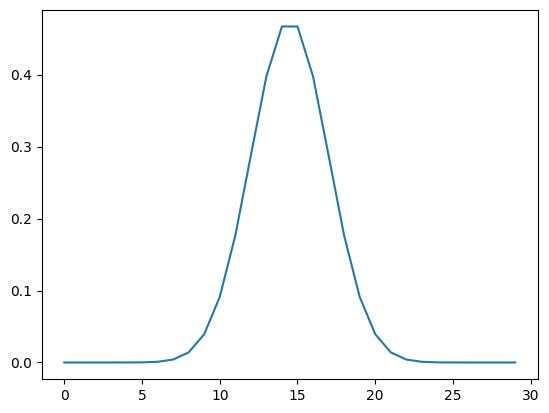

In [ ]:
alpha=(1)
C=expm(alpha*a-alpha.conjugate()*a_dag)
coherent_state = np.dot(C,unic_eig)
weight = []
for i in range(d1):
    weight.append(np.abs(np.vdot(coherent_state,eig_sta_int[i])))
plt.plot(weight)

In [ ]:
#exploring the alternative of jsut finding the eigenstate of the annihilation operator.



In [122]:

print(unic_eig)
#unic_eig=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


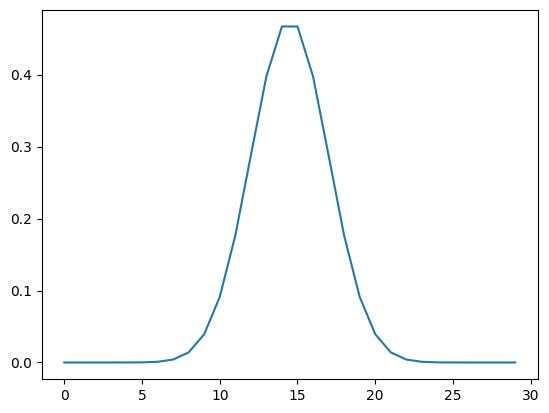

In [123]:
weight = []
for i in range(d1):
    weight.append(np.abs(np.vdot(unic_eig,eig_sta_int[i])))
plt.plot(weight)
